In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.cluster import MeanShift, KMeans


In [242]:
ms = MeanShift()
km = KMeans(n_clusters=10)

In [243]:

X = cv2.imread('sample_img/in.jpg')


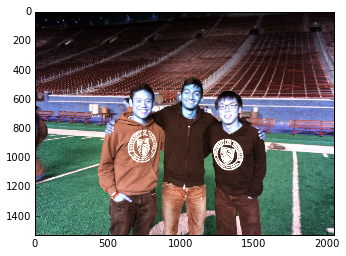

In [244]:
# show original image
plt.imshow(X)

True

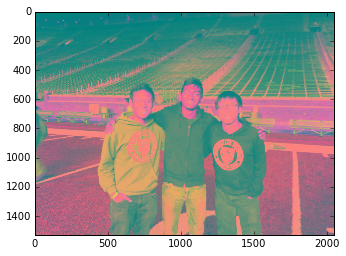

In [270]:
# histogram equalization in color
X_ycr_cb = cv2.cvtColor(X, cv2.COLOR_RGB2YCR_CB)
X_hist = cv2.equalizeHist(X_ycr_cb[:,:,0])
X_ycr_cb[:,:,0] = X_hist
plt.imshow(X_ycr_cb)
cv2.imwrite('sample_img/hist_equalization.jpg', X_ycr_cb)

In [274]:

# Add cell shading
# apply smoothing segmentation
X_filt = cv2.pyrMeanShiftFiltering(X, 15, 40)
X_grey = cv2.cvtColor(X, cv2.COLOR_RGB2BGRA)
weight = 10
edges = cv2.Canny(X_grey, 100, 200)
# http://stackoverflow.com/questions/3954484/cartoonizing-real-images
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
shaded = X_filt + weight*edges_rgb

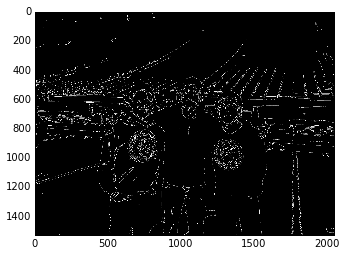

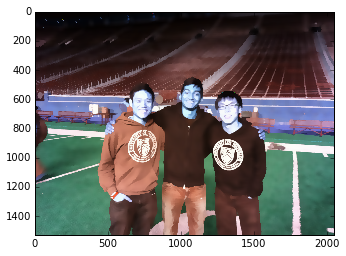

In [275]:
plt.imshow(edges_rgb, cmap='gray')
plt.figure()
plt.imshow(shaded)

In [250]:
import PIL
import skimage
cv2.imwrite('sample_img/out.jpg', shaded)

True